In [26]:
import os
os.environ['KERAS_BACKEND']='theano'

%matplotlib inline

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, CuDNNLSTM
from keras.datasets import imdb

from distutils.version import LooseVersion as LV
from keras import __version__
from keras import backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using Keras version: 2.2.4 backend: theano


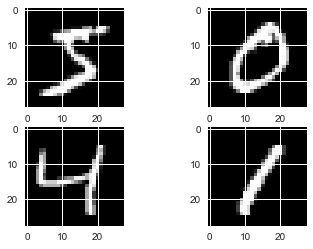

In [39]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [40]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print()
y_train.shape

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)



(60000,)

In [29]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [30]:
seed = 7
numpy.random.seed(seed)

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [32]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_pixels

784

In [34]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (60000, 784)
X_test: (10000, 784)


In [35]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [37]:
def baseline_model():
	
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [38]:
model = baseline_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2796 - acc: 0.9205 - val_loss: 0.1392 - val_acc: 0.9583
Epoch 2/10
 - 6s - loss: 0.1105 - acc: 0.9679 - val_loss: 0.0895 - val_acc: 0.9726
Epoch 3/10
 - 6s - loss: 0.0703 - acc: 0.9800 - val_loss: 0.0797 - val_acc: 0.9760
Epoch 4/10
 - 6s - loss: 0.0494 - acc: 0.9856 - val_loss: 0.0737 - val_acc: 0.9781
Epoch 5/10
 - 6s - loss: 0.0361 - acc: 0.9898 - val_loss: 0.0677 - val_acc: 0.9787
Epoch 6/10
 - 6s - loss: 0.0264 - acc: 0.9927 - val_loss: 0.0636 - val_acc: 0.9810
Epoch 7/10
 - 6s - loss: 0.0194 - acc: 0.9956 - val_loss: 0.0588 - val_acc: 0.9825
Epoch 8/10
 - 6s - loss: 0.0125 - acc: 0.9977 - val_loss: 0.0603 - val_acc: 0.9818
Epoch 9/10
 - 6s - loss: 0.0099 - acc: 0.9982 - val_loss: 0.0586 - val_acc: 0.9810
Epoch 10/10
 - 6s - loss: 0.0076 - acc: 0.9987 - val_loss: 0.0589 - val_acc: 0.9812
Baseline Error: 1.88%


In [17]:

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [18]:
seed = 7
numpy.random.seed(seed)

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [20]:
X_train = X_train / 255
X_test = X_test / 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [21]:
def baseline_model():
	
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [22]:
model = baseline_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 66s - loss: 0.2344 - acc: 0.9332 - val_loss: 0.0811 - val_acc: 0.9748
Epoch 2/10
 - 67s - loss: 0.0720 - acc: 0.9782 - val_loss: 0.0437 - val_acc: 0.9852
Epoch 3/10
 - 68s - loss: 0.0511 - acc: 0.9842 - val_loss: 0.0398 - val_acc: 0.9872
Epoch 4/10
 - 69s - loss: 0.0400 - acc: 0.9876 - val_loss: 0.0381 - val_acc: 0.9878
Epoch 5/10
 - 69s - loss: 0.0332 - acc: 0.9897 - val_loss: 0.0335 - val_acc: 0.9882
Epoch 6/10
 - 65s - loss: 0.0267 - acc: 0.9919 - val_loss: 0.0305 - val_acc: 0.9898
Epoch 7/10
 - 67s - loss: 0.0229 - acc: 0.9926 - val_loss: 0.0325 - val_acc: 0.9877
Epoch 8/10
 - 79s - loss: 0.0187 - acc: 0.9940 - val_loss: 0.0279 - val_acc: 0.9899
Epoch 9/10
 - 88s - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0309 - val_acc: 0.9895
Epoch 10/10
 - 90s - loss: 0.0148 - acc: 0.9952 - val_loss: 0.0314 - val_acc: 0.9903
CNN Error: 0.97%
